In [1]:
import dendropy as dp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tree = dp.Tree.get(path='./seasia.newick', schema="newick")
print 'started with %d leaves'%len(tree.leaf_nodes())

started with 4523 leaves


In [3]:
def find_mrcas(tree, sep='/'):
    serotypes = ['DENV1', 'DENV2', 'DENV3', 'DENV4']
    serotype_tips = {sero: [] for sero in serotypes}
    for k in tree.leaf_iter():
        sero = k.taxon.label.split(sep)[0]
        if sero in serotypes:
            serotype_tips[sero].append(k.taxon.label)
    serotype_mrcas = {sero: tree.mrca(taxon_labels=serotype_tips[sero]) for sero in serotypes} # find the serotype mrca
    return serotype_mrcas

def plot_date_div(tree, sep='/'):
    
    tree.calc_node_root_distances()
    serotype_mrcas = find_mrcas(tree, sep)
    
    fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(12,3))
    for ax, (serotype, mrca) in zip(axes,serotype_mrcas.items()):
        leaves = mrca.leaf_iter()
        dates = []
        div = []
        for l in mrca.leaf_iter():
            try:
                dates.append(float(l.taxon.label.split(sep)[-1]))
                div.append(float(l.root_distance))
            except:
                continue

        ax.plot(dates, div, 'o')
        ax.set_title(serotype)
    plt.tight_layout()
    plt.show()
        

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  after removing the cwd from sys.path.


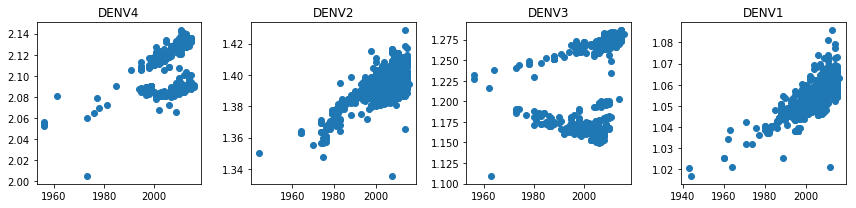

In [4]:
plot_date_div(tree, sep='/')

In [12]:
def extract_subtrees(tree, sep='/'):
    n_leaves = len(list(tree.leaf_iter()))
    serotype_mrcas = find_mrcas(tree, sep)
    serotype_subtrees = {}
    
    n_subtree_leaves = 0
    for serotype, mrca in serotype_mrcas.items():
        subtree = dp.Tree(seed_node=mrca)
        n_subtree_leaves += len(list(subtree.leaf_iter()))
        serotype_subtrees[serotype] = subtree
        
    assert n_subtree_leaves == n_leaves
    return subtrees

serotype_subtrees = extract_subtrees(tree)

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:2: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  
/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  after removing the cwd from sys.path.


ValueError: Null leafset bitmask (0)

In [5]:
def reroot_subtree(serotype, tree, sep='/'):
    
    serotype_mrcas = find_mrcas(tree, sep)
    subtree_mrca = serotype_mrcas[serotype] # find current mrca node
    
    subtree_mrca_parent = subtree_mrca.parent_node # log its parent for future reattachment
    subtree = dp.Tree(seed_node=subtree_mrca) # extract subtree
    print 'split to subtrees with %d and %d leaves'%(len(tree.leaf_nodes()), len(subtree.leaf_nodes()))
    
    # reroot so the oldest tip is the outgroup 
    subtree_oldest_tip = sorted(list(subtree.leaf_iter()), key = lambda l: int(l.taxon.label.split(sep)[-1]))[0]
    print 'setting this tip as the outgroup', subtree_oldest_tip.taxon.label
    subtree.to_outgroup_position(subtree_oldest_tip, update_bipartitions=False)
    
    # find the new mrca of the extracted subtree
    new_subtree_mrca = subtree_oldest_tip.parent_node
    
    # reattach the rerooted subtree to the original parent we noted before
    subtree_mrca_parent.add_child(new_subtree_mrca)
    print 'reattached subtree, now %d leaves'%len(tree.leaf_nodes())
    
    return tree

In [6]:
rerooted_denv3 = reroot_subtree('DENV3', tree, sep=' ')

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  after removing the cwd from sys.path.


split to subtrees with 3897 and 615 leaves
setting this tip as the outgroup DENV3 PHILIPPINES ILIPPINES 1956
reattached subtree, now 4512 leaves


/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:11: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  # This is added back by InteractiveShellApp.init_path()


/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  after removing the cwd from sys.path.


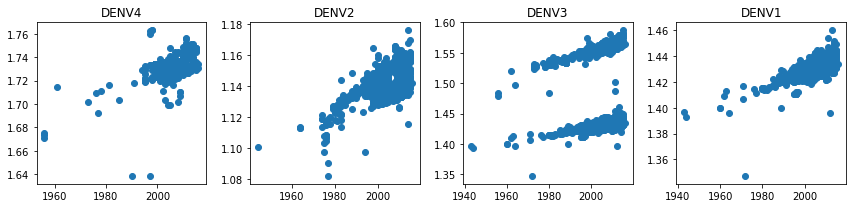

In [7]:
plot_date_div(rerooted_denv3, sep=' ')

In [6]:
rerooted_denv1_denv3 = reroot_subtree('DENV3', tree)

split to subtrees with 38 and 9 leaves
setting this tip as the outgroup DENV3/PUERTO RICO/S228762/1963
reattached subtree, now 47 leaves


/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  


In [11]:
new_serotype_mrcas = find_mrcas(rerooted_denv1_denv3)
rerooted_denv1_denv3.calc_node_root_distances()

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'leaf_iter()' will no longer be supported in future releases; use 'leaf_node_iter()' instead
  after removing the cwd from sys.path.


[0.29041,
 0.29507,
 0.30524999999999997,
 0.30609000000000003,
 0.30593000000000004,
 0.2925400000000001,
 0.28999,
 0.2933800000000001,
 0.30144000000000004,
 0.30695000000000006,
 0.30143000000000003,
 0.30059,
 0.30393000000000003,
 0.28824,
 0.28994000000000003,
 0.29884,
 0.3034,
 0.28995,
 0.29927,
 0.30351,
 0.30479,
 0.30435999999999996,
 0.30223,
 0.30181,
 0.30097,
 0.30266,
 0.30308999999999997,
 0.30266,
 0.27415999999999996,
 0.28985,
 0.29513999999999996,
 0.29513999999999996,
 0.29981,
 0.29811,
 0.31588000000000005,
 0.31418000000000007,
 0.31333,
 0.31369,
 0.31257999999999997,
 0.27745,
 0.27534000000000003,
 0.27703,
 0.26389,
 0.26940000000000003,
 0.27619,
 0.27575999999999995,
 0.27575999999999995]

12


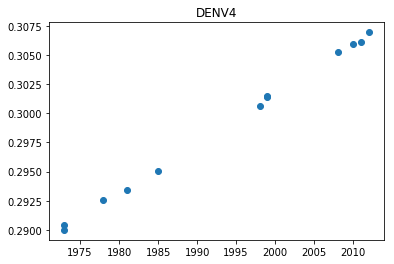

16


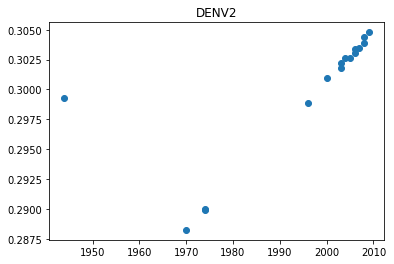

9


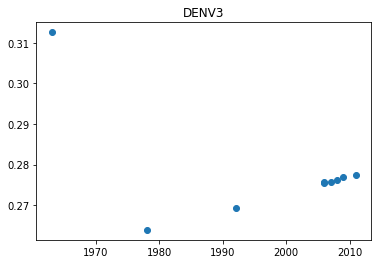

19


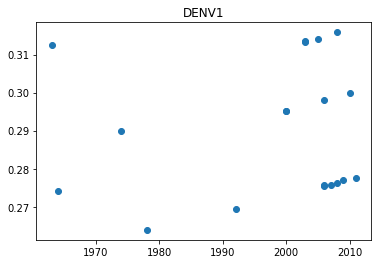

reattached subtree, now 47 leaves


In [13]:
# write to file
tree.write(path="dengue_rerooted.newick", schema="newick")

split to subtrees with 37 and 10 leaves
